<a href="https://colab.research.google.com/github/WinetraubLab/coregister-xz/blob/main/rotate_fluorescence_image.ipynb" target="_blank">
<img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>
  
<a href="https://github.com/WinetraubLab/coregister-xz/blob/main/rotate_fluorescence_image.ipynb" target="_blank">
  <img src="https://img.shields.io/badge/view%20in-GitHub-blue" alt="View in GitHub"/>
</a>

# Overview
This notebook will find the best rotation for the fluorescence image that will best meet u,v consistency assumptions.

In [1]:
# @title Script inputs

# On the fluorescence image, record which points are on every line (x,y pixels)
# Lines show up from left to right on the flourescence image
fluorescence_image_points_on_line_pix = [
    [ [ 205, 712], [ 217, 748] ], # A few points on line 0 (v)
    [ [ 325, 656], [ 328, 690] ], # A few points on line 1 (v)
    [ [ 392, 618], [ 418, 645] ], # ...
    [ [ 826, 360], [ 848, 385] ],
    [ [ 973, 280], [ 984, 310] ],
    [ [1009, 258], [1022, 294] ],
    [ [1068, 194], [1080, 233] ], # A few points on line 6 (h)
  ]

cut_position = 4
mirror_image = False # Use in case you want to mirror image

# Fluorescence image file path, set to empty string '' to upload an image or use google drive path
image_file_path = 'image_processing/fluorescence_image_example.png'

In [2]:
# @title Environment Setup

if not 'setup_env_rotate_fluorescence_image' in globals():
  setup_env_rotate_fluorescence_image = True
  !git clone --recurse-submodules https://github.com/WinetraubLab/coregister-xz/
  %cd ./coregister-xz/

from plane.fit_plane import FitPlane
from image_processing.fluorescent_image_preprocessing import rotate_image_to_meet_consistency_assumptions
from image_processing.draw_fluorescent_image import draw_fluorescent_image
from pattern.photobleach_pattern import Pattern
import numpy as np
import matplotlib.pyplot as plt
import cv2

if '/content/drive/' in image_file_path:
  from google.colab import drive
  drive.mount('/content/drive/')

Cloning into 'coregister-xz'...
remote: Enumerating objects: 378, done.
remote: Counting objects: 100% (145/145), done.
remote: Compressing objects: 100% (102/102), done.
remote: Total 378 (delta 94), reused 85 (delta 43), pack-reused 233 (from 1)
Receiving objects: 100% (378/378), 1.09 MiB | 13.58 MiB/s, done.
Resolving deltas: 100% (218/218), done.
/content/coregister-xz


Before


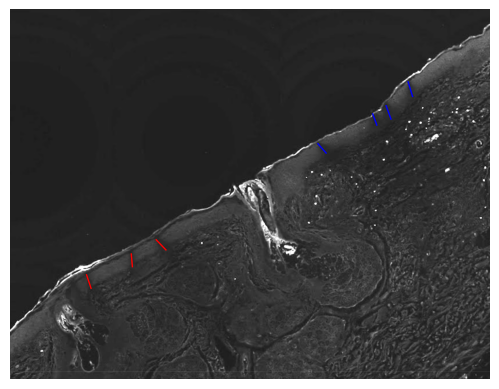

After


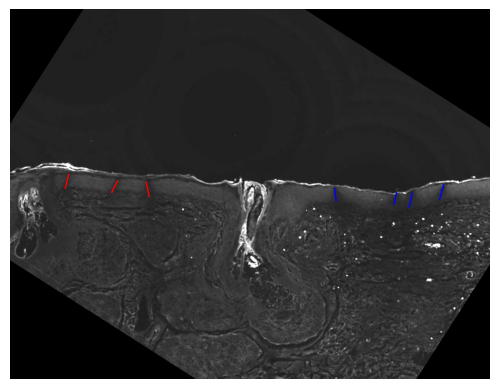

Rotation was -32.6 degrees


In [3]:
# @title Do the Work

pattern = Pattern()
photobleach_line_position_mm, photobleach_line_group = pattern.project_pattern_onto_plane(cut_position)

# Check input length
if (len(fluorescence_image_points_on_line_pix) !=
    pattern.get_number_of_lines()):
    raise ValueError('Number of lines identified in the fluorescence_image should be equal to number of lines in template')

# Upload image
if not image_file_path:
  from google.colab import files
  import os
  uploaded = files.upload()
  image_file_path = list(uploaded.keys())[0]
  image_file_path = os.path.join(os.getcwd(), image_file_path)

# Load image
image = cv2.cvtColor(cv2.imread(image_file_path),cv2.COLOR_BGR2RGB)

print('Before')
draw_fluorescent_image(image,fluorescence_image_points_on_line_pix,photobleach_line_group)

# Flip if needed
if mirror_image:
  # Mirror image
  image = cv2.flip(image, 1)

  # Mirror lines
  for i in range(len(fluorescence_image_points_on_line_pix)): # Loop lines
    for j in range(len(fluorescence_image_points_on_line_pix[i])): # Loop points on each line
      fluorescence_image_points_on_line_pix[i][j][0] = image.shape[1] - 1 - fluorescence_image_points_on_line_pix[i][j][0]


# Find optimal rotation and draw results
fluorescence_image_points_on_line_pix_out, image_out, angle_rad = rotate_image_to_meet_consistency_assumptions(
    fluorescence_image_points_on_line_pix,
    photobleach_line_position_mm,
    photobleach_line_group,
    image)

# Save image to local
cv2.imwrite('rotated_image.png', image_out)

print('After')
draw_fluorescent_image(image_out,fluorescence_image_points_on_line_pix_out,photobleach_line_group)

print(f"Rotation was {np.round(angle_rad*180/np.pi*10)/10} degrees")

In [4]:
# @title Print modified points

print('fluorescence_image_points_on_line_pix = [')
for i in range(len(fluorescence_image_points_on_line_pix_out)): # Loop lines
  txt = '    ['
  for j in range(len(fluorescence_image_points_on_line_pix_out[i])): # Loop points on each line
    txt += f' [{round(fluorescence_image_points_on_line_pix_out[i][j][0])}, {round(fluorescence_image_points_on_line_pix_out[i][j][0])}],'
  txt = txt[:-1]
  txt += ' ]'
  print(txt)
print('  ]')

fluorescence_image_points_on_line_pix = [
    [ [157, 157], [148, 148] ]
    [ [289, 289], [273, 273] ]
    [ [365, 365], [373, 373] ]
    [ [870, 870], [875, 875] ]
    [ [1037, 1037], [1030, 1030] ]
    [ [1079, 1079], [1071, 1071] ]
    [ [1163, 1163], [1153, 1153] ]
  ]


In [5]:
# @title Download rotated image to local computer
from google.colab import files
files.download('rotated_image.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>